# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab we will use the titanic dataset to see the impact of tree pruning and hyper parameter tuning on the predictive performance of decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. In this lab, we shall work with the Titanic dataset and see how we can tweak different hyper parameters for optimal pruning of the trees. 

## Objectives
You will be able to:
- Demonstrate how pruning is performed for decision trees 
- Understand and explain the role of different Decision tree hyperparameters
- Select the best values for chosen hyperparameters and monitor the improvement in performance

## Import necessary libraries

Let's first import the libraries you would need for this lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

## Read the Titanic Dataset

In the repo, we have made titanic dataset , all cleaned up and pre-processed for you, so that you can focus on pruning and optimization. The features set is available as `featues.csv` and target variable as `target.csv`. 
- Load these files into separate dataframes below.
- Check the shape for consistency and the view the head 

In [8]:
# Load features and target variables

# Your code here 

X = pd.read_csv('features.csv')
y = pd.read_csv('target.csv')

This is great. Now that we have our x (feat) and y(target), we can go ahead and make a split necessary for supervised learning.

## Create a 70/30 Train/Test split
- Using features and target variables above , create a 70/30 split using 

In [9]:
# Create a 70/30 split for given X and y 


# Your code here 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 10)  

So now we have our data ready for training, lets first train a DT classifier with this data
## Train a Vanilla Classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Create a decision tree instance
- Fit a DT classifier with training dataset using all default settings for hyperparameters i.e. we don't change any parameter.
- Set the impurity criteria to "entropy".

In [10]:
# Train the classifier using training data 


# Your code here 
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train)  
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under curve) to check the predictive performance

In [73]:
# Make predictions using test set 


# Your code here 
from sklearn.metrics import accuracy_score, roc_curve, auc
y_pred = classifier.predict(X_test)  

# Check the AUC of predictions


# Your code here 
# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# # Create and print a confusion matrix 
# print('\nConfusion Matrix')
# print('----------------')
# pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :74.25373134328358

AUC is :0.72


## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree. 
- Create an array for for depth values ranging from 1 - 32. 
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

In [145]:
# Identify the optimal tree depth for given data
my_df= pd.DataFrame(list(range(1,33,1)),columns=['depth'])
my_df['clf'] = my_df['depth'].apply(lambda x: DecisionTreeClassifier(max_depth=x).fit(X_train,y_train) )
#training results
my_df['train_pred']=my_df['clf'].apply(lambda x: x.predict(X_train))
my_df['train_pred_fpr'],my_df['train_pred_tpr'],my_df['train_pred_thresholds'] = zip(*my_df['train_pred'].map(lambda x: roc_curve(y_train,x)))
my_df['train_pred_auc'] = my_df.apply(lambda x: auc(x['train_pred_fpr'],x['train_pred_tpr']),axis=1)

#test results
my_df['y_pred'] = my_df['clf'].apply(lambda x: x.predict(X_test))
my_df['y_pred_fpr'],my_df['y_pred_tpr'],my_df['y_pred_thresholds'] = zip(*my_df['y_pred'].map(lambda x: roc_curve(y_test,x)))    
my_df['y_pred_auc'] = my_df.apply(lambda x: auc(x['y_pred_fpr'],x['y_pred_tpr']),axis=1)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
depth                    32 non-null int64
clf                      32 non-null object
train_pred               32 non-null object
train_pred_fpr           32 non-null object
train_pred_tpr           32 non-null object
train_pred_thresholds    32 non-null object
train_pred_auc           32 non-null float64
y_pred                   32 non-null object
y_pred_fpr               32 non-null object
y_pred_tpr               32 non-null object
y_pred_thresholds        32 non-null object
y_pred_auc               32 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 3.1+ KB


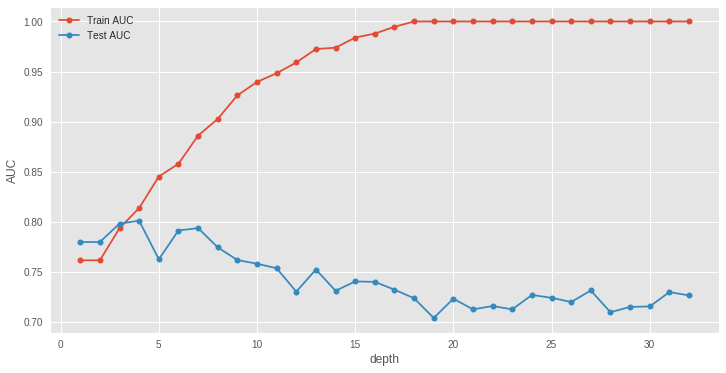

In [149]:
plt.figure(figsize=(12,6))
plt.plot(my_df['depth'], my_df['train_pred_auc'], label='Train AUC',marker='.',markersize=12)
plt.plot(my_df['depth'], my_df['y_pred_auc'], label='Test AUC',marker='.',markersize=12)
plt.ylabel('AUC')
plt.xlabel('depth')
plt.legend()
plt.show()

In [32]:
# You observations here 
#training increases with depth - signs of overfit
#test accuracy decreases after 4

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree. 
- Create an array for for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

In [150]:
# Identify the optimal min-samples-split for given data
import numpy as np

my_df = pd.DataFrame(list((np.arange(.1,1.1,.1))),columns=['min_sample_split'])
my_df['clf'] = my_df['min_sample_split'].apply(lambda x: DecisionTreeClassifier(min_samples_split=x).fit(X_train,y_train) )
#training results
my_df['train_pred']=my_df['clf'].apply(lambda x: x.predict(X_train))
my_df['train_pred_fpr'],my_df['train_pred_tpr'],my_df['train_pred_thresholds'] = zip(*my_df['train_pred'].map(lambda x: roc_curve(y_train,x)))
my_df['train_pred_auc'] = my_df.apply(lambda x: auc(x['train_pred_fpr'],x['train_pred_tpr']),axis=1)

#test results
my_df['y_pred'] = my_df['clf'].apply(lambda x: x.predict(X_test))
my_df['y_pred_fpr'],my_df['y_pred_tpr'],my_df['y_pred_thresholds'] = zip(*my_df['y_pred'].map(lambda x: roc_curve(y_test,x)))    
my_df['y_pred_auc'] = my_df.apply(lambda x: auc(x['y_pred_fpr'],x['y_pred_tpr']),axis=1)
my_df.info()
# Your code here 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
min_sample_split         10 non-null float64
clf                      10 non-null object
train_pred               10 non-null object
train_pred_fpr           10 non-null object
train_pred_tpr           10 non-null object
train_pred_thresholds    10 non-null object
train_pred_auc           10 non-null float64
y_pred                   10 non-null object
y_pred_fpr               10 non-null object
y_pred_tpr               10 non-null object
y_pred_thresholds        10 non-null object
y_pred_auc               10 non-null float64
dtypes: float64(3), object(9)
memory usage: 1.1+ KB


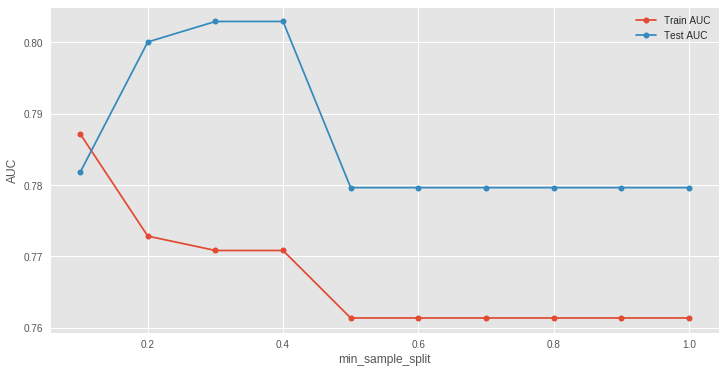

In [151]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

plt.figure(figsize=(12,6))
plt.plot(my_df['min_sample_split'], my_df['train_pred_auc'], label='Train AUC',marker='.',markersize=12)
plt.plot(my_df['min_sample_split'], my_df['y_pred_auc'], label='Test AUC',marker='.',markersize=12)
plt.ylabel('AUC')
plt.xlabel('min_sample_split')
plt.legend()
plt.show()

In [100]:
# Your observations
best_min_samples_split = .4


## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree. 
- Create an array for for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

In [155]:
# Calculate the optimal value for minimum sample leafs

# Your code here 
import numpy as np

my_df = pd.DataFrame(list((np.arange(.1,.6,.1))),columns=['min_samples_leaf'])
my_df['clf'] = my_df['min_samples_leaf'].apply(lambda x: DecisionTreeClassifier(min_samples_leaf=x).fit(X_train,y_train) )
#training results
my_df['train_pred']=my_df['clf'].apply(lambda x: x.predict(X_train))
my_df['train_pred_fpr'],my_df['train_pred_tpr'],my_df['train_pred_thresholds'] = zip(*my_df['train_pred'].map(lambda x: roc_curve(y_train,x)))
my_df['train_pred_auc'] = my_df.apply(lambda x: auc(x['train_pred_fpr'],x['train_pred_tpr']),axis=1)

#test results
my_df['y_pred'] = my_df['clf'].apply(lambda x: x.predict(X_test))
my_df['y_pred_fpr'],my_df['y_pred_tpr'],my_df['y_pred_thresholds'] = zip(*my_df['y_pred'].map(lambda x: roc_curve(y_test,x)))    
my_df['y_pred_auc'] = my_df.apply(lambda x: auc(x['y_pred_fpr'],x['y_pred_tpr']),axis=1)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
min_samples_leaf         5 non-null float64
clf                      5 non-null object
train_pred               5 non-null object
train_pred_fpr           5 non-null object
train_pred_tpr           5 non-null object
train_pred_thresholds    5 non-null object
train_pred_auc           5 non-null float64
y_pred                   5 non-null object
y_pred_fpr               5 non-null object
y_pred_tpr               5 non-null object
y_pred_thresholds        5 non-null object
y_pred_auc               5 non-null float64
dtypes: float64(3), object(9)
memory usage: 608.0+ bytes


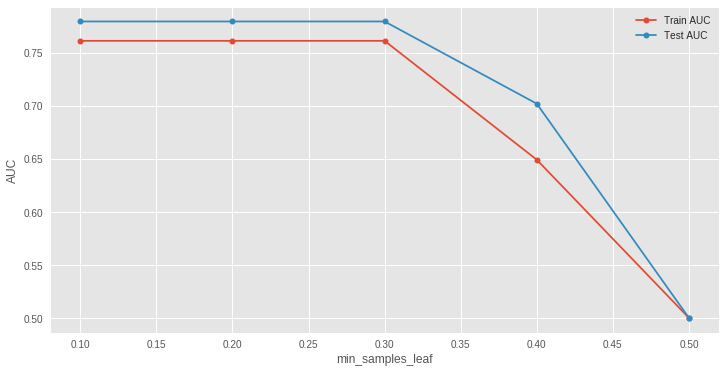

In [156]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

plt.figure(figsize=(12,6))
plt.plot(my_df['min_samples_leaf'], my_df['train_pred_auc'], label='Train AUC',marker='.',markersize=12)
plt.plot(my_df['min_samples_leaf'], my_df['y_pred_auc'], label='Test AUC',marker='.',markersize=12)
plt.ylabel('AUC')
plt.xlabel('min_samples_leaf')
plt.legend()
plt.show()

In [190]:
# Your observations here

best_min_samples_leaf=.3

## Maximum Features

Now check for the best `max_features` parameter value for our decision tree. 
- Create an array for for `max_features` values ranging from 1 - 12 (1 features vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

In [157]:
# Find the best value for optimal maximum feature size

my_df = pd.DataFrame(list((range(1,13,1))),columns=['max_features'])
my_df['clf'] = my_df['max_features'].apply(lambda x: DecisionTreeClassifier(max_features=x).fit(X_train,y_train) )
#training results
my_df['train_pred']=my_df['clf'].apply(lambda x: x.predict(X_train))
my_df['train_pred_fpr'],my_df['train_pred_tpr'],my_df['train_pred_thresholds'] = zip(*my_df['train_pred'].map(lambda x: roc_curve(y_train,x)))
my_df['train_pred_auc'] = my_df.apply(lambda x: auc(x['train_pred_fpr'],x['train_pred_tpr']),axis=1)

#test results
my_df['y_pred'] = my_df['clf'].apply(lambda x: x.predict(X_test))
my_df['y_pred_fpr'],my_df['y_pred_tpr'],my_df['y_pred_thresholds'] = zip(*my_df['y_pred'].map(lambda x: roc_curve(y_test,x)))    
my_df['y_pred_auc'] = my_df.apply(lambda x: auc(x['y_pred_fpr'],x['y_pred_tpr']),axis=1)
my_df.info()

# Your code here 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
max_features             12 non-null int64
clf                      12 non-null object
train_pred               12 non-null object
train_pred_fpr           12 non-null object
train_pred_tpr           12 non-null object
train_pred_thresholds    12 non-null object
train_pred_auc           12 non-null float64
y_pred                   12 non-null object
y_pred_fpr               12 non-null object
y_pred_tpr               12 non-null object
y_pred_thresholds        12 non-null object
y_pred_auc               12 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.2+ KB


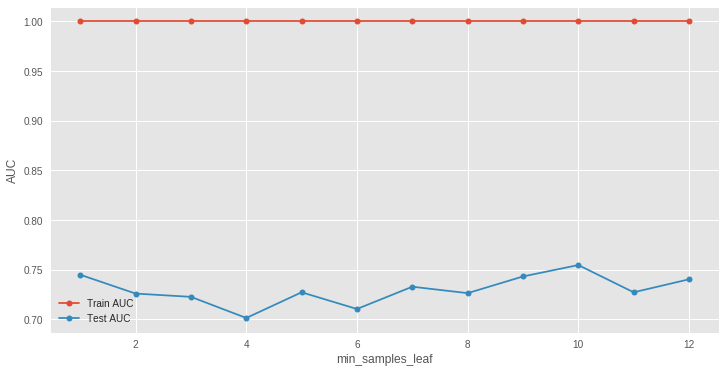

In [158]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

plt.figure(figsize=(12,6))
plt.plot(my_df['max_features'], my_df['train_pred_auc'], label='Train AUC',marker='.',markersize=12)
plt.plot(my_df['max_features'], my_df['y_pred_auc'], label='Test AUC',marker='.',markersize=12)
plt.ylabel('AUC')
plt.xlabel('min_samples_leaf')
plt.legend()
plt.show()

In [178]:
# Your observations here 
best_max_feature = 10


## Re-train the classifier with chosen values

So now we shall use the best values from each training phase above and feed it back to our classifier and see if have any improvement in predictive performance. 

- Train the classifier with optimal values identified 
- compare the AUC with vanilla DT AUC 
- Interpret the results of comparison

In [159]:
# train a classifier with optimal values identified above
best_depth = 4
best_min_samples_split = .4
best_min_samples_leaf=.3
best_max_features= 10

# Your code here 
clf = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=best_depth,
            max_features=best_max_features, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=best_min_samples_leaf, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best').fit(X_train,y_train)



In [116]:
y_pred = clf.predict(X_test)
train_pred=clf.predict(X_train)

In [114]:
# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# # Create and print a confusion matrix 
# print('\nConfusion Matrix')
# print('----------------')
# pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :80.59701492537313

AUC is :0.78


In [ ]:
# You observations here 
#0.7348379629629629

In the next section, we shall talk about hyper-parameter tuning using a technique called "grid-search" to make this process even more granular and decisive. 


## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid over fitting and increasing the generalization capabilities of the classifier. For the Titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 